Ingrese la velocidad de la moto (m/s): 5
Ingrese la aceleración del policía (m/s^2): 5
Se encuentran en t = 2.00 segundos


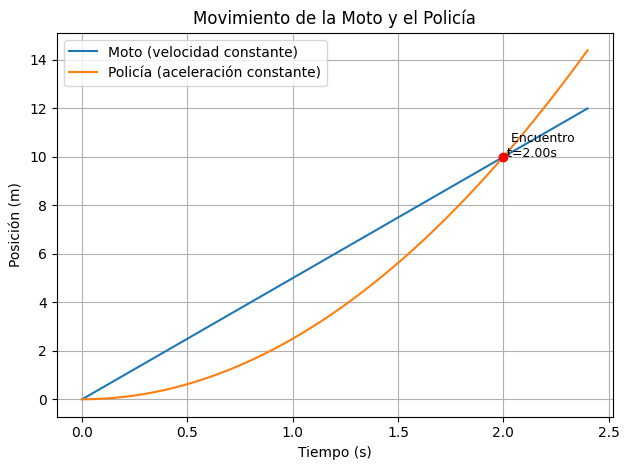

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

v_m = float(input("Ingrese la velocidad de la moto (m/s): "))
a_p = float(input("Ingrese la aceleración del policía (m/s^2): "))

t_encuentro = (2 * v_m) / a_p
print(f"Se encuentran en t = {t_encuentro:.2f} segundos")

t = np.linspace(0, t_encuentro * 1.2, 500)

x_moto = v_m * t
x_policia = 0.5 * a_p * t**2

plt.plot(t, x_moto, label="Moto (velocidad constante)")
plt.plot(t, x_policia, label="Policía (aceleración constante)")

x_encuentro = v_m * t_encuentro
plt.plot(t_encuentro, x_encuentro, 'ro')
plt.text(t_encuentro, x_encuentro, f'  Encuentro \n t={t_encuentro:.2f}s', fontsize=9)

plt.title("Movimiento de la Moto y el Policía")
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición (m)")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


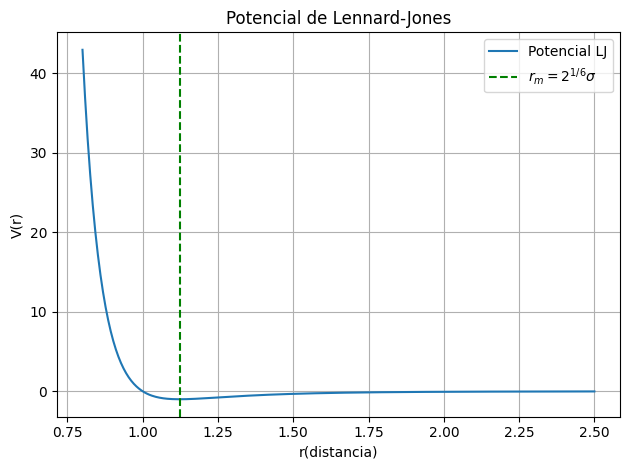

Sigma = 0.5
  r mínimo numérico: 0.56
  r mínimo teórico:  0.56
---------------------------
Sigma = 1.0
  r mínimo numérico: 1.12
  r mínimo teórico:  1.12
---------------------------
Sigma = 2.0
  r mínimo numérico: 2.25
  r mínimo teórico:  2.24
---------------------------


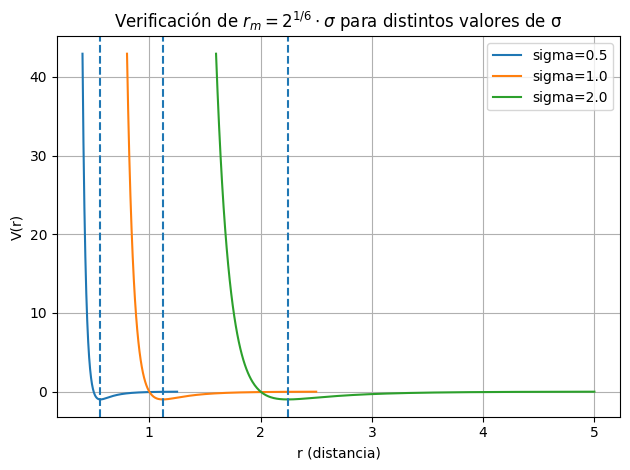

In [ ]:
# 1. Función del potencial de LJ

def lenny(r, epsilon=1.0, sigma=1.0):
    return (4*epsilon*((sigma/r)**12 - (sigma/r)**6))

# 2. Gráfico para sigma = epsilon = 1

epsilon = 1.0
sigma = 1.0

r = np.linspace(0.8 * sigma, 2.5 * sigma, 400)
V = lenny(r, epsilon, sigma)
r_min = 2**(1/6) * sigma

plt.plot(r, V, label='Potencial LJ')
plt.axvline(r_min, color='green', linestyle='--', label='$r_m = 2^{1/6} \sigma$')
plt.title("Potencial de Lennard-Jones")
plt.xlabel("r(distancia)")
plt.ylabel("V(r)")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# 3. Verificación de r_m para diferentes valores de sigma

sigmas = [0.5, 1.0, 2.0]
epsilon = 1.0

for sigma in sigmas:
    r = np.linspace(0.8*sigma, 2.5*sigma, 500) #desde 0.8 es que se llega a apreciar el mínimo en la gráfica
    V = lenny(r, epsilon, sigma)

    r_min_i = np.argmin(V)
    r_min_numerico = r[r_min_i]
    r_min_teorico = 2**(1/6) * sigma

    plt.plot(r, V, label=f'sigma={sigma}')
    plt.axvline(r_min_teorico, linestyle='--')

    print(f"Sigma = {sigma}")
    print(f"  r mínimo numérico: {r_min_numerico:.2f}")
    print(f"  r mínimo teórico:  {r_min_teorico:.2f}")
    print("-" * 27)

plt.title("Verificación de $r_m = 2^{1/6} * sigma para distintos valores de sigma")
plt.xlabel("r (distancia)")
plt.ylabel("V(r)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[0]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]

alturas = alturas.rename(columns={
    'Country': 'País',
    'Average Height, Boys, 19 yo (cm)↓': 'Altura media niños (cm)',
    'Girls 19 (cm)': 'Altura media niñas (cm)'
})

#Nos quedamos con solo las columnas que necesitamos
alturas = alturas[['País', 'Altura media niños (cm)', 'Altura media niñas (cm)']]

alturas


,País,Altura media niños (cm),Altura media niñas (cm)
0,Netherlands,184,170
1,Montenegro,183,170
2,Estonia,183,169
3,Bosnia and Herzegovina,182,167
4,Iceland,182,169
...,...,...,...
191,Papua New Guinea,163,157
192,Solomon Islands,163,157
193,Laos,163,153
194,Timor-Leste,160,153


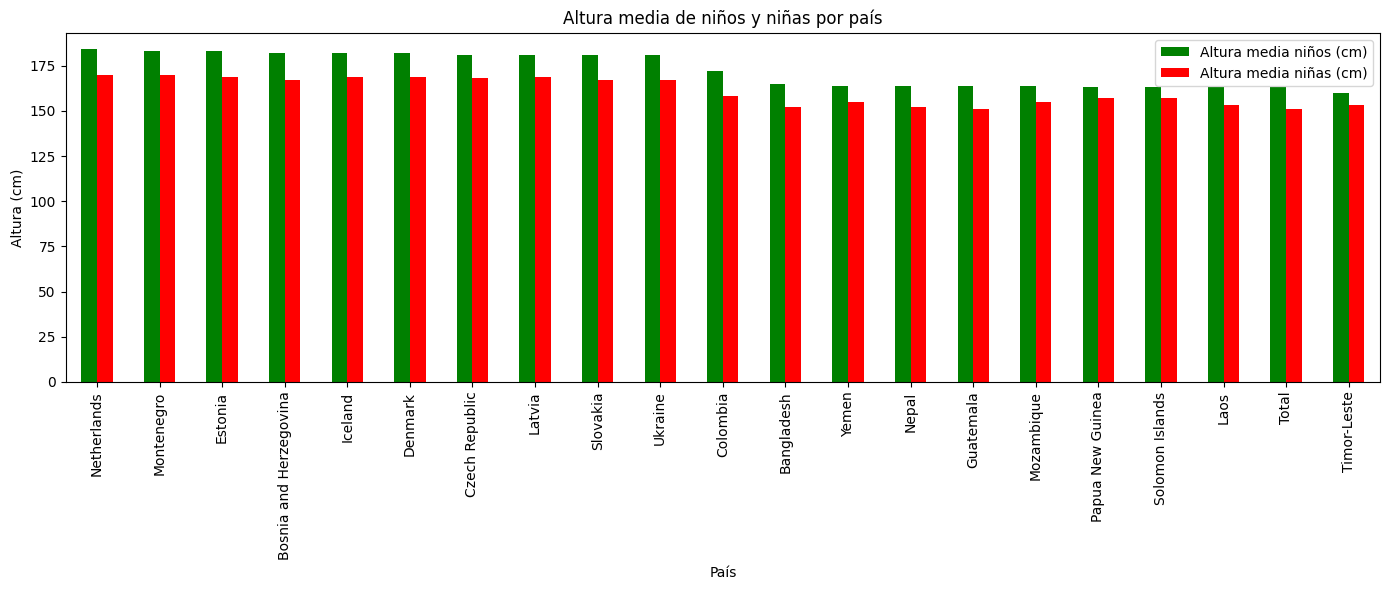

In [ ]:
alturas_ordenadas = alturas.sort_values(by='Altura media niños (cm)', ascending=False) #Ordenamos por altura masculina

#Escojemos los 10 países más altos y más bajos
altos = alturas_ordenadas.head(10)
bajos = alturas_ordenadas.tail(10)

#Se incluye colombia
colombia = alturas[alturas['País'] == 'Colombia']
alturas_filtradas = pd.concat([altos, bajos, colombia], axis=0)

#Ordenamos otra vez ya que se agregó a colombia anteriormente
alturas_filtradas = alturas_filtradas.sort_values(by='Altura media niños (cm)', ascending=False)


alturas_filtradas.set_index('País')[['Altura media niños (cm)', 'Altura media niñas (cm)']].plot(
    kind='bar',
    figsize=(14, 6),
    color=['green', 'red']
)

plt.ylabel('Altura (cm)')
plt.title('Altura media de niños y niñas por país')
plt.tight_layout()
plt.show()


In [ ]:
income =  income[["Country", "GDP per Adult 2022"]]
income = income.rename(columns={
    'Country': 'País',
    'GDP per Adult 2022': 'GPD'
}) #Nos quedamos con las columnas que queremos y modificamos los nombres

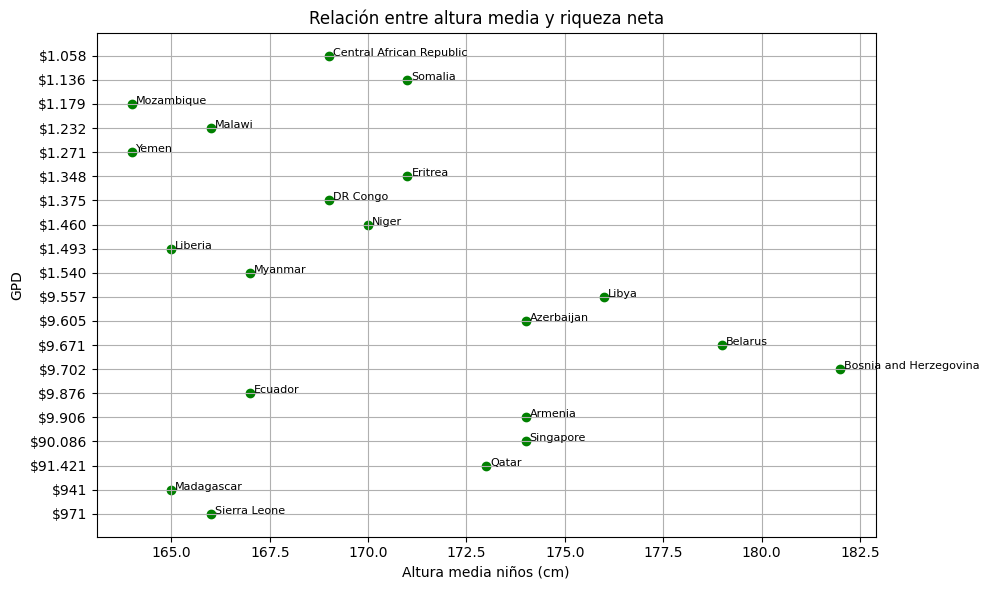

In [ ]:
combo = pd.merge(alturas, income, on='País')
combo.dropna() #Combinamos los dos data frames y eliminamos las filas que tengan datos faltantes si es que hay

combo['GPD'] = combo['GPD'].str.replace(',', '.')

merged_ordenado = combo.sort_values(by='GPD', ascending=False)
grupo_mayor = merged_ordenado.head(10)
grupo_menor = merged_ordenado.tail(10)
graf = pd.concat([grupo_mayor, grupo_menor])

plt.figure(figsize=(10, 6))
plt.scatter(graf['Altura media niños (cm)'], graf['GPD'], color='green')

for i, row in graf.iterrows(): #Para poder etiquetar cada punto en la grafica con su respectivo nombre
    plt.text(row['Altura media niños (cm)'] + 0.1, row['GPD'], row['País'], fontsize=8) #se le suma el 0.1 para que el texto no este encima del punto

plt.title('Relación entre altura media y GPD')
plt.xlabel('Altura media niños (cm)')
plt.ylabel('GPD')
plt.grid(True)
plt.tight_layout()
plt.show()  #No parece haber alguna relación entre la altura y GPD. ¿Los bajitos parecen tener menos GPD?